BloomTech Data Science

*Unit 2, Sprint 1, Module 1*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression I

During the guided project, we predicted how much it would cost to buy a condo in Tribecca. For the module project, your goal will be similar: predict how much it costs to rent an apartment in New York City.

Dataset source: [renthop.com](https://www.renthop.com/).

## Directions

> Do Not Copy-Paste. You must *type* each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.
>
> — Zed Shaw, [Learn Python the Hard Way](https://learnpythonthehardway.org/)

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using wrangle function.
- **Task 2:** Conduct exploratory data analysis (EDA) and plot the relationship between one feature and the target `'price'`.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Establish the baseline mean absolute error for your dataset.
- **Task 5:** Build and train a `Linearregression` model.
- **Task 6:** Check the mean absolute error of our model on the training data.
- **Task 7:** Extract and print the intercept and coefficient from your `LinearRegression` model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

## I. Wrangle Data

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)

    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) &
            (df['price'] <= np.percentile(df['price'], 99.5)) &
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) &
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) &
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Use the above `wrangle` function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [9]:
df = wrangle('https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/apartments/renthop-nyc.csv')

**Task 2:** Use your `pandas` and dataviz skills to explore the dataset. As part of this process, make a scatter plot that shows the relationship between one of the numerical features in the dataset and the target `'price'`.

**Remember:** You should plot your feature on the `X` axis and your target on the `y` axis.

In [14]:
df.head()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room
0,1.5,3,40.7145,-73.9425,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,40.7947,-73.9667,5465,1,1,0,1,1,0,0,0,1,0,0,0,0,0
2,1.0,1,40.7388,-74.0018,2850,0,0,1,0,0,1,0,1,0,0,0,0,0,0
3,1.0,1,40.7539,-73.9677,3275,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,1.0,4,40.8241,-73.9493,3350,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [13]:
df.drop(['created','description','display_address','street_address','interest_level','high_speed_internet','balcony','swimming_pool','new_construction','terrace','exclusive','loft','garden_patio','wheelchair_access','common_outdoor_space'],axis=1,inplace=True)

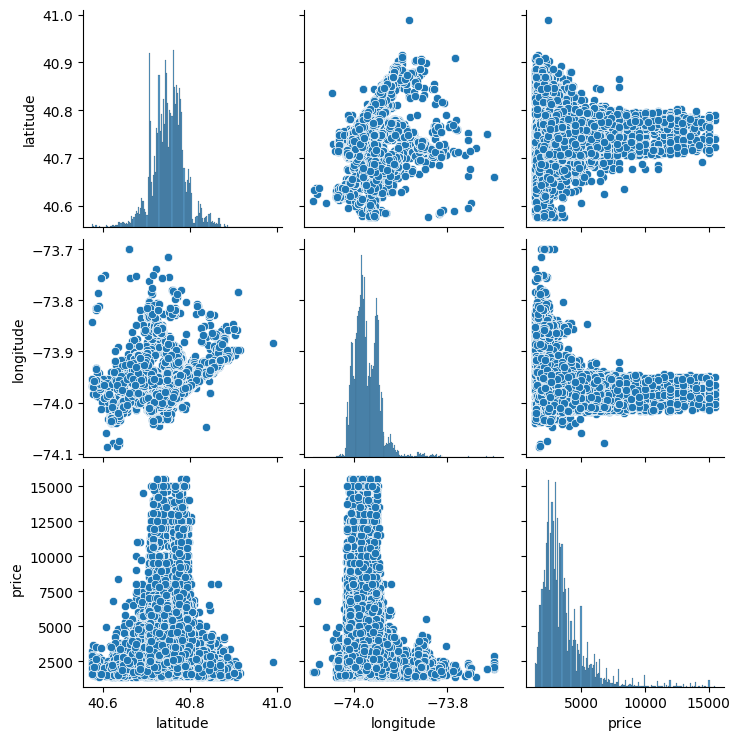

In [15]:
sns.pairplot(df, vars=['latitude','longitude','price'])

In [16]:
mean_latitude = df['latitude'].mean()

In [18]:
df['d_from_mean_lat'] = abs(mean_latitude - df['latitude'])

<Axes: xlabel='d_from_mean_lat', ylabel='price'>

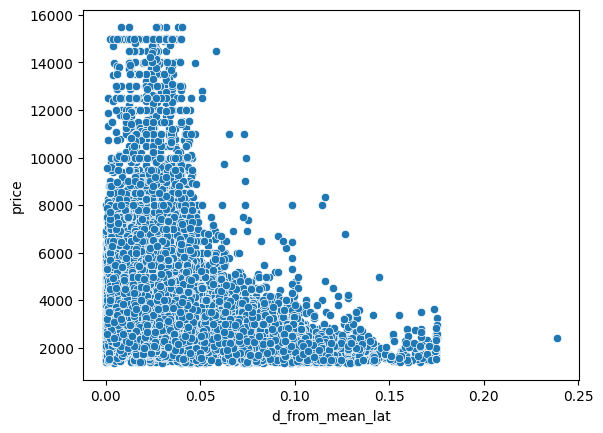

In [21]:
sns.scatterplot(x='d_from_mean_lat',y='price',data=df)

#  II. Split Data

**Task 3:** Choose one feature from the dataset and assign it to your feature matrix `X`. Then assign the column `'price'` to the target vector `y`.

**Remember:** Your feature matrix needs to be two-dimensional, but your target vector must be one-dimensional.

In [35]:
X = df[['d_from_mean_lat']]
y = df['price']

# III. Establish Baseline

**Task 4:** Since this is a **regression** problem, you need to calculate the baseline the mean absolute error for your model. First, calculate the mean of `y`. Next, create a list `y_pred` that has the same length as `y` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [37]:
df.drop(['elevator',	'cats_allowed',	'hardwood_floors',	'dogs_allowed',	'doorman', 'pre-war',	'laundry_in_unit',	'roof_deck',	'outdoor_space',	'dining_room'],axis=1,inplace=True)

In [39]:
df.drop(['dishwasher',	'no_fee',	'laundry_in_building',	'fitness_center'],axis=1,inplace=True)

In [40]:
df.head()

,bathrooms,bedrooms,latitude,longitude,price,d_from_mean_lat,log_d_lat,log_price,d_from_mean_long,d_from_mean
0,1.5,3,40.7145,-73.9425,3000,0.03626,-3.317037,8.006368,0.03026,0.06652
1,1.0,2,40.7947,-73.9667,5465,0.04394,-3.124933,8.606119,0.00606,0.05000
2,1.0,1,40.7388,-74.0018,2850,0.01196,-4.426178,7.955074,0.02904,0.04100
3,1.0,1,40.7539,-73.9677,3275,0.00314,-5.763567,8.094073,0.00506,0.00820
4,1.0,4,40.8241,-73.9493,3350,0.07334,-2.612651,8.116716,0.02346,0.09680


In [41]:
y_mean = df['price'].mean()
df['y_pred'] = y_mean
baseline_mae = mean_absolute_error(df['price'],df['y_pred'])
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1201.532252154329


# IV. Build Model

**Task 5:** Build and train a `LinearRegression` model named `model` using your feature matrix `X` and your target vector `y`.

In [42]:
# Step 1: Import predictor class


# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X,y)

LinearRegression()

# V. Check Metrics

**Task 6:** How does your model perform in comparison to your baseline? Calculate the mean absolute error for your model's predictions.

In [44]:
df['predicted_price'] = model.predict(df[['d_from_mean_lat']])

In [45]:
df.head()

,bathrooms,bedrooms,latitude,longitude,price,d_from_mean_lat,log_d_lat,log_price,d_from_mean_long,d_from_mean,y_pred,predicted_price
0,1.5,3,40.7145,-73.9425,3000,0.03626,-3.317037,8.006368,0.03026,0.06652,3579.585247,3477.650713
1,1.0,2,40.7947,-73.9667,5465,0.04394,-3.124933,8.606119,0.00606,0.05000,3579.585247,3363.592377
2,1.0,1,40.7388,-74.0018,2850,0.01196,-4.426178,7.955074,0.02904,0.04100,3579.585247,3838.548584
3,1.0,1,40.7539,-73.9677,3275,0.00314,-5.763567,8.094073,0.00506,0.00820,3579.585247,3969.544357
4,1.0,4,40.8241,-73.9493,3350,0.07334,-2.612651,8.116716,0.02346,0.09680,3579.585247,2926.950509


In [46]:
training_mae = mean_absolute_error(df['price'],df['predicted_price'])
print('Training MAE:', training_mae)

Training MAE: 1160.0033023799533


# VI. Communicate Results

You've just created a linear model. That means that your model makes predictions using an equation that looks like $\texttt{apt price} = \texttt{intercept}~+~\texttt{coefficient}~\times~\texttt{your feature}$. But what are the values of the intercept and coefficient that your model is using?

**Task 7:** Print out the intercept and coefficient associated with `model`.

In [48]:
print(f'model coeff={model.coef_}, intercept={model.intercept_}')

model coeff=[-14851.76420439], intercept=4016.177289881776
